# Лабораторная работа 9. Деревья решений

In [121]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
import matplotlib.pyplot as plt

In [122]:
df=pd.read_csv('CO2_emission.csv')
cols_drop = ['Model_Year','Make','Model', 'Transmission', 'Vehicle_Class', 'Fuel_Consumption_comb(L/100km)', 'CO2_Emissions']
df = df.drop(columns=cols_drop)
X=df.iloc[:,:4]
y=df.iloc[:,4]
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)
print(X_sm.shape)
print(X.shape)
df_new_sm=pd.concat([X_sm, y_sm], axis=1)
df_new_sm.shape
df = df_new_sm
df.head(10)

(1210, 4)
(935, 4)


,Engine_Size,Cylinders,Fuel_Consumption_in_City(L/100 km),Fuel_Consumption_in_City_Hwy(L/100 km),Smog_Level
0,2.4,4,9.9,7.0,3
1,3.5,6,11.1,10.8,3
2,2.0,4,11.0,8.6,6
3,2.0,4,11.3,9.1,6
4,2.0,4,11.2,8.0,7
5,2.0,4,11.3,8.1,7
6,2.0,4,10.0,7.2,3
7,2.0,4,10.5,7.7,3
8,2.9,6,13.5,9.3,3
9,2.0,4,10.3,8.1,3


In [123]:
df['Категория'] = pd.cut(df['Smog_Level'], bins=[0, 4, 7], labels=["Низкий", "Высокий"])
#df['Категория'] = pd.cut(df['Smog_Level'], bins=[0, 2, 5, 7], labels=[0, 1, 2]).astype(int)
df

,Engine_Size,Cylinders,Fuel_Consumption_in_City(L/100 km),Fuel_Consumption_in_City_Hwy(L/100 km),Smog_Level,Категория
0,2.4,4,9.900000,7.000000,3,Низкий
1,3.5,6,11.100000,10.800000,3,Низкий
2,2.0,4,11.000000,8.600000,6,Высокий
3,2.0,4,11.300000,9.100000,6,Высокий
4,2.0,4,11.200000,8.000000,7,Высокий
...,...,...,...,...,...,...
1205,3.8,8,17.400000,11.966764,1,Низкий
1206,6.2,8,22.369036,16.444264,1,Низкий
1207,6.4,8,15.900000,9.600000,1,Низкий
1208,6.2,8,18.400619,11.233540,1,Низкий


In [124]:
X=df.iloc[:, [0, 1]]
y=df.iloc[:,5]

In [125]:
X

,Engine_Size,Cylinders
0,2.4,4
1,3.5,6
2,2.0,4
3,2.0,4
4,2.0,4
...,...,...
1205,3.8,8
1206,6.2,8
1207,6.4,8
1208,6.2,8


In [126]:
y

0        Низкий
1        Низкий
2       Высокий
3       Высокий
4       Высокий
         ...   
1205     Низкий
1206     Низкий
1207     Низкий
1208     Низкий
1209     Низкий
Name: Категория, Length: 1210, dtype: category
Categories (2, object): ['Низкий' < 'Высокий']

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=0) #разбиваем выборку на обучающую и тестовую

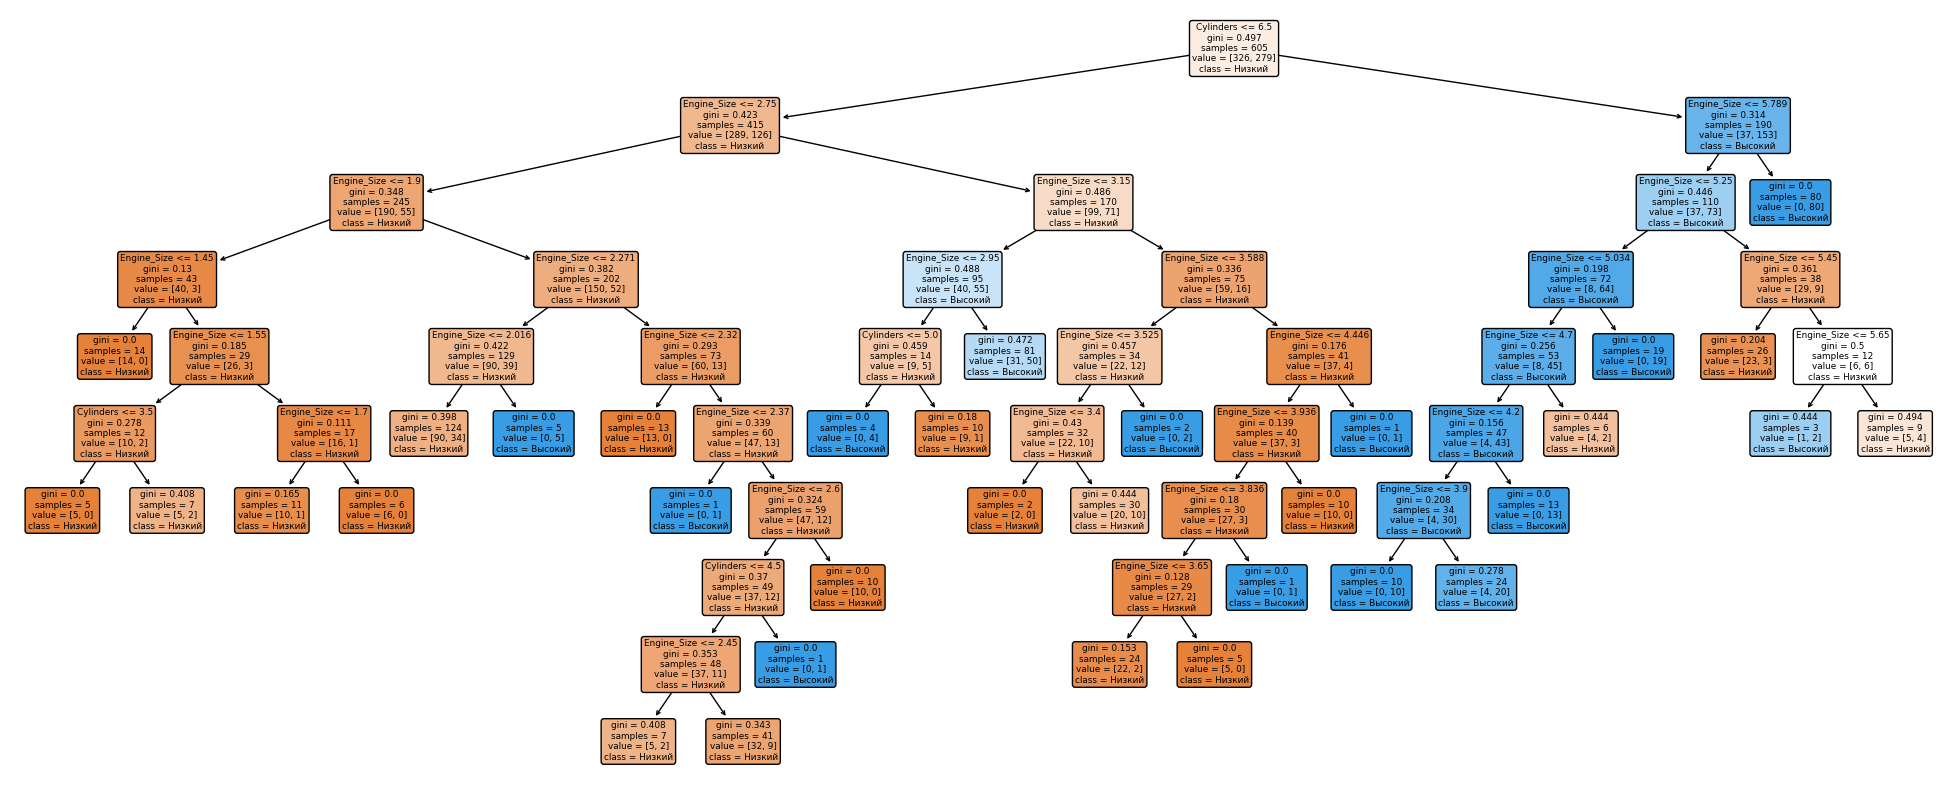

Проверка на новом образце ['Низкий']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [128]:
clf = DecisionTreeClassifier() # создаем классификатор на основе дерева
clf = clf.fit(X_train, y_train) # обучаем его, т.е. создаем само дерево
y_score=clf.predict(X_test)
plt.figure(figsize=((25,10)))
plot_tree(clf,filled=True, feature_names= X.columns.tolist(),class_names=y.unique(),rounded=True)
plt.show()
# проверка на новых образцах
sample_1=clf.predict([[3,4]])
print(f"Проверка на новом образце {sample_1}")

              precision    recall  f1-score   support

     Высокий       0.73      0.86      0.79       311
      Низкий       0.82      0.67      0.73       294

    accuracy                           0.77       605
   macro avg       0.77      0.76      0.76       605
weighted avg       0.77      0.77      0.76       605

[[267  44]
 [ 98 196]]


Text(0.5, 1.1, 'Матрица неточности \n')

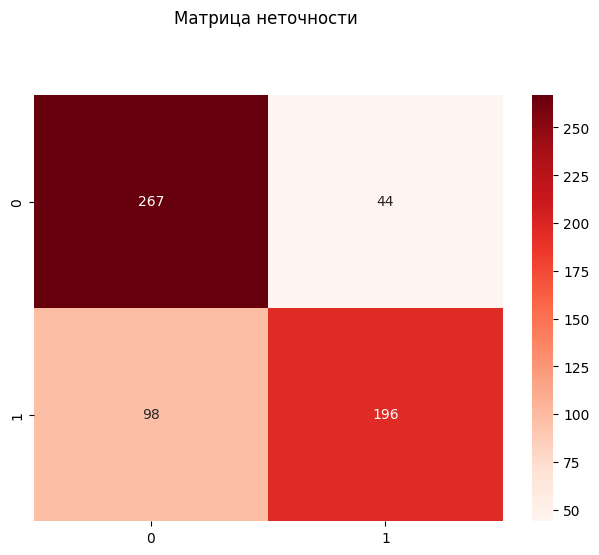

In [129]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# оценка точности модели
print(metrics.classification_report(y_test, y_score))
# матрица неточности
confusion_matrix = confusion_matrix(y_test, y_score)
print(confusion_matrix)
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True,cmap="Reds" , fmt='g')
plt.tight_layout()
plt.title('Матрица неточности \n', y=1.1)

In [130]:
value = ["Низкий", "Высокий"]
words = {"Низкий":0, "Высокий":1 }
y_test_n = np.array([words.get(i,0) for i in y_test])

y_pred_n = np.array([words.get(i,0) for i in y_score])

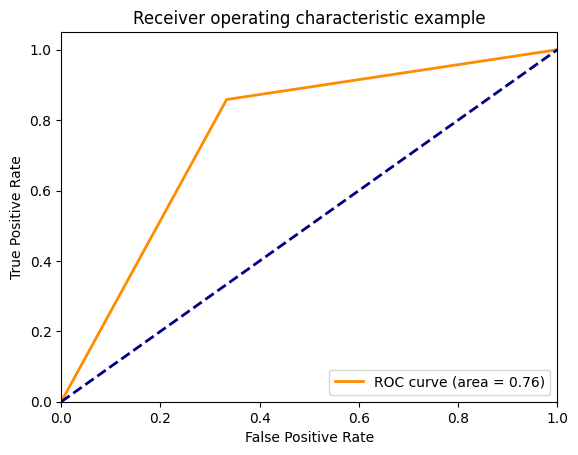

In [131]:

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
# ROC - анализ
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, thresholds = roc_curve(y_test_n > 0, y_pred_n  > 0)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [132]:
import graphviz # подключаем библиотеку для отображения деревьев
dot_data = export_graphviz(clf, out_file=None) # конвертируем в DOT (в переменную или в файл)
graph = graphviz.Source(dot_data)  # загружаем дерево из переменной или файла в представление graphviz
graph.render("Сейв") # отображаем в файл (по умолчанию pdf)

'Сейв.pdf'

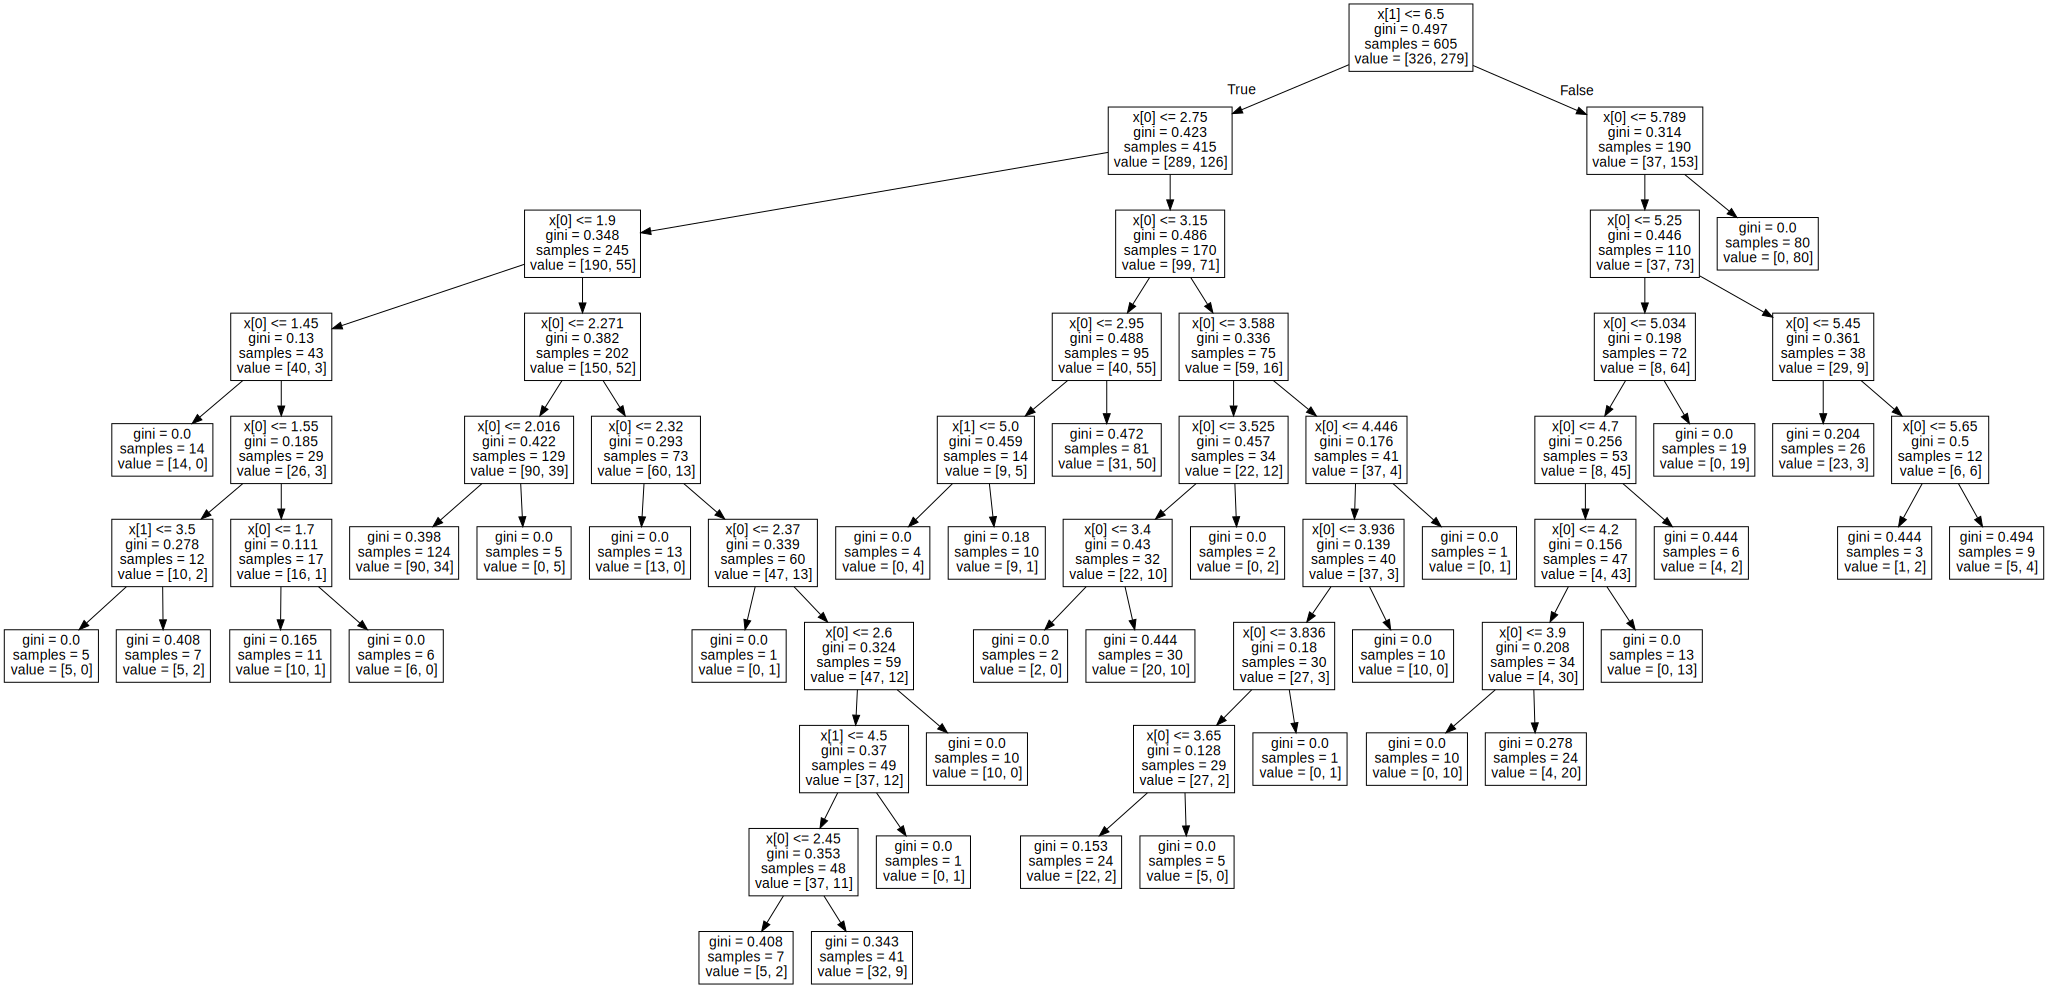

In [133]:
graphviz.Source(dot_data)

In [134]:
from sklearn.tree import export_text # подключаем функцию
r = export_text(clf, feature_names=X.columns.tolist()) # переводим дерево в текстовую строку
print(r) # печатаем

|--- Cylinders <= 6.50
|   |--- Engine_Size <= 2.75
|   |   |--- Engine_Size <= 1.90
|   |   |   |--- Engine_Size <= 1.45
|   |   |   |   |--- class: Высокий
|   |   |   |--- Engine_Size >  1.45
|   |   |   |   |--- Engine_Size <= 1.55
|   |   |   |   |   |--- Cylinders <= 3.50
|   |   |   |   |   |   |--- class: Высокий
|   |   |   |   |   |--- Cylinders >  3.50
|   |   |   |   |   |   |--- class: Высокий
|   |   |   |   |--- Engine_Size >  1.55
|   |   |   |   |   |--- Engine_Size <= 1.70
|   |   |   |   |   |   |--- class: Высокий
|   |   |   |   |   |--- Engine_Size >  1.70
|   |   |   |   |   |   |--- class: Высокий
|   |   |--- Engine_Size >  1.90
|   |   |   |--- Engine_Size <= 2.27
|   |   |   |   |--- Engine_Size <= 2.02
|   |   |   |   |   |--- class: Высокий
|   |   |   |   |--- Engine_Size >  2.02
|   |   |   |   |   |--- class: Низкий
|   |   |   |--- Engine_Size >  2.27
|   |   |   |   |--- Engine_Size <= 2.32
|   |   |   |   |   |--- class: Высокий
|   |   |   |   |--- E

0.7553719008264462
              precision    recall  f1-score   support

     Высокий       0.73      0.84      0.78       311
      Низкий       0.79      0.67      0.73       294

    accuracy                           0.76       605
   macro avg       0.76      0.75      0.75       605
weighted avg       0.76      0.76      0.75       605

[[260  51]
 [ 97 197]]


Text(0.5, 1.1, 'Матрица неточности \n')

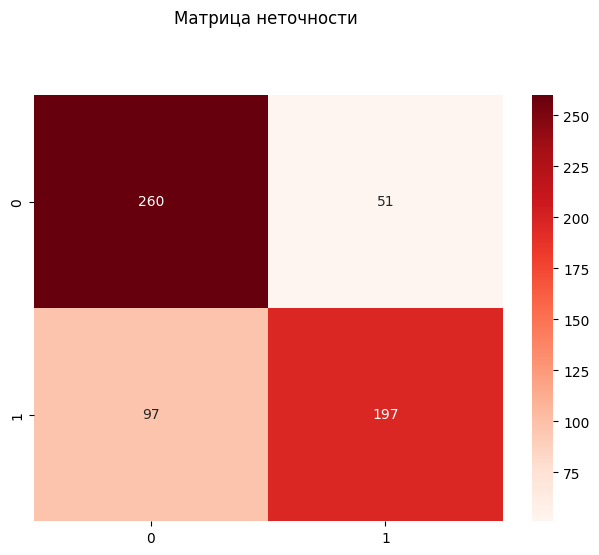

In [135]:
from sklearn.datasets import make_classification # для генерации данных
from sklearn.model_selection import train_test_split # для разделения на обучение и тест
from sklearn.ensemble import RandomForestClassifier # случайный лес
from sklearn import metrics
from sklearn.metrics import confusion_matrix

import numpy as np
import seaborn as sns # для простого отображения
import matplotlib.pyplot as plt #

# Создаем классификатор на основе случайного леса. Изменяйте параметры и смотрите как это влияет на обучение
clf = RandomForestClassifier(max_depth=5,# максимальная глубина дерева
                             n_estimators=10,# число деревьев в лесу
                             max_features=1)# максимальное число признаков для каждого дерева

clf.fit(X_train, y_train) # обучаем

y_pred = clf.predict(X_test) # проверяем на тестовых данных

score=clf.score(X_test, y_test) # считаем среднюю точность
print(score)

# оценка точности модели
print(metrics.classification_report(y_test, y_pred))
# матрица неточности
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True,cmap="Reds" , fmt='g')
plt.tight_layout()
plt.title('Матрица неточности \n', y=1.1)

In [136]:
value = ["Низкий", "Средний", "Высокий"]
words = {"Низкий":0, "Средний":1,"Высокий":2 }
y_test_n = np.array([words.get(i,0) for i in y_test])

y_pred_n = np.array([words.get(i,0) for i in y_pred])


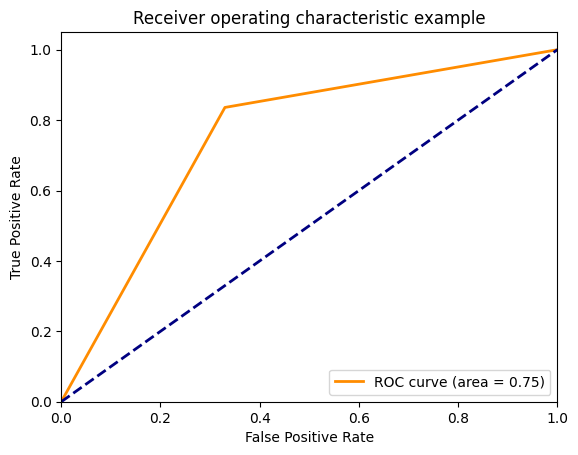

In [137]:

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
# ROC - анализ
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, thresholds = roc_curve(y_test_n > 0, y_pred_n  > 0)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## Визуализация леса

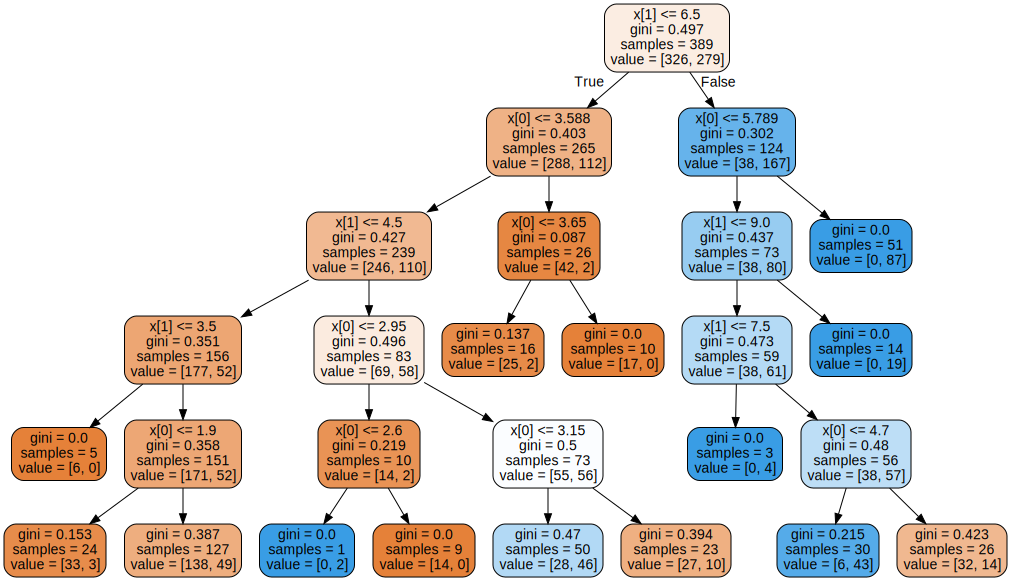

In [138]:
tree_data=clf.estimators_[2] # третье дерево

# рисуем его
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(tree_data, out_file=None,  # можем указать дополнительные опции конвертации
                     filled=True, rounded=True)  # прочие детали отображения
graph = graphviz.Source(dot_data)  # # загружаем дерево из переменной или файла в представление graphviz
graph  # отображаем на экране